Zunächst müssen einige Pakete eingelesen werden, die wir später brauchen werden. Mit Hilfe dieser Pakete können wir z.B. die Daten auslesen und Graphen erstellen.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

print('imported all modules')

imported all modules


Dann definieren wir uns einige eigene Funktionen. 

In [2]:
### Leptonen aus csv auslesen
def ReadLeptons(data, event):
  lepton1 = np.array([ data.values[event][0], data.values[event][1], data.values[event][2], data.values[event][3] ])
  lepton2 = np.array([ data.values[event][4], data.values[event][5], data.values[event][6], data.values[event][7] ])
  lepton3 = np.array([ data.values[event][8], data.values[event][9], data.values[event][10], data.values[event][11] ])
  lepton4 = np.array([ data.values[event][12], data.values[event][13], data.values[event][14], data.values[event][15] ])
  return [ lepton1, lepton2, lepton3, lepton4 ]

### Ereignisgewicht aus csv auslesen
def ReadWeight(data, event):
  return data.values[event][16]

### Energie von Teilchen berechnen
def Energy(p):
  return p[3]

### Pt von Teilchen berechnen
def Pt(p):
  pt = math.sqrt( p[0]*p[0] + p[1]*p[1] )
  return pt

### Masse von Teilchen berechnen
def Mass(p):
  mass = 0
  '''
  hier muss noch die Masse berechnet werden
  Die Formel lautet:
  m2 = - px*px - py*py - pz*pz + E*E

  Wenn m2 > 0 ist, kann die Wurzel gezogen werden:
  mass = math.sqrt( m2 )

  Falls m2 < 0, sollten wir einen anderen Wert einsetzen:
  mass = 0
  '''
  return mass

### Funktion um einen Graphen zu zeichnen
def plot(nbins, min, max, datavalues, mcvalues, mcweights, mcnames, xlabel):
  fig = plt.figure()
  fig.subplots_adjust()
  ax1 = fig.add_subplot()
  ax1.set_ylabel('Events')
  ax1.set_xlabel(xlabel)
  plt.hist( mcvalues, weights = mcweights , bins=nbins, range=(min,max), label=mcnames, stacked=True )
  datahist,bins = np.histogram(datavalues, bins=nbins, range=(min,max))
  binsize = (max-min)/nbins
  real_bins = [x+binsize/2 for x in bins]
  del real_bins[-1] 
  yerror = [math.sqrt(x) for x in datahist]
  xerror = [binsize/2 for x in datahist]
  plt.errorbar( real_bins, datahist, yerr=yerror, xerr=xerror, marker=".", label="Data", fmt='o', color="black" ) 
  plt.legend(loc="upper right")
  plt.show()

### Print Funktion um den Fortschritt des Lesens zu sehen
def PrintProgress(event, Nevents):
  percentage = PrintProgress.counter*0.2
  if event > percentage*Nevents:
    print('   - ',int(percentage*100),'% (',event, 'of', Nevents, 'events processed)')
    PrintProgress.counter += 1
  if event == Nevents-1:
    PrintProgress.counter = 0
PrintProgress.counter = 0

pathtocsv = 'https://raw.githubusercontent.com/denschwarz/PPT_csv/master/'

print('defined all functions and variables')

defined all functions and variables


Nun lesen wir die Daten ein. Die Daten sind [hier](https://github.com/denschwarz/PPT_csv) im CSV Format hochgeladen und wir können sie von dort auslesen. 

<div>
  <center>
    <img src="https://raw.githubusercontent.com/denschwarz/PPT_csv/master/CSV.png" width="500"/>
  </center>
</div>



In [3]:
### Einlesen der Daten
LepEnergyData = []
LepPtData = []

Datafiles = [
             'DATA_Elektron_2011.csv',
             'DATA_Myon_2011.csv',
             'DATA_Elektron_2012.csv',
             'DATA_Myon_2012.csv'
]
for filename in Datafiles:
  print('start with', filename)
  csvdata = pd.read_csv(pathtocsv+filename, header=None)
  Nevents = len(csvdata)
  for event in range(Nevents):
    PrintProgress(event,Nevents)

    ### Hier steht der eigentliche Analyse-Code
    Leptons = ReadLeptons(csvdata, event)

    energy = Energy(Leptons[0])
    pt = Pt(Leptons[0])
    LepEnergyData.append(energy)
    LepPtData.append(pt)


    #########
  
  print('   - done')


start with DATA_Elektron_2011.csv
   -  0 % ( 1 of 7 events processed)
   -  20 % ( 2 of 7 events processed)
   -  40 % ( 3 of 7 events processed)
   -  60 % ( 5 of 7 events processed)
   -  80 % ( 6 of 7 events processed)
   - done
start with DATA_Myon_2011.csv
   -  0 % ( 1 of 31 events processed)
   -  20 % ( 7 of 31 events processed)
   -  40 % ( 13 of 31 events processed)
   -  60 % ( 19 of 31 events processed)
   -  80 % ( 25 of 31 events processed)
   - done
start with DATA_Elektron_2012.csv
   -  0 % ( 1 of 41 events processed)
   -  20 % ( 9 of 41 events processed)
   -  40 % ( 17 of 41 events processed)
   -  60 % ( 25 of 41 events processed)
   -  80 % ( 33 of 41 events processed)
   - done
start with DATA_Myon_2012.csv
   -  0 % ( 1 of 199 events processed)
   -  20 % ( 40 of 199 events processed)
   -  40 % ( 80 of 199 events processed)
   -  60 % ( 120 of 199 events processed)
   -  80 % ( 160 of 199 events processed)
   - done


Jetzt lesen wir simulierte Ereignisse des Prozesses ZZ->4l ein, die der Untergrund dieser Analyse sind.
<div>
  <center>
    <img src="https://raw.githubusercontent.com/denschwarz/PPT_csv/master//ZZ.png" width="400"/>
  </center>
</div>



In [4]:
### Einlesen von ZZ
LepEnergyZZ = []
LepPtZZ = []
WeightsZZ = []


ZZfiles = [
             'MC_ZZ_2el2mu_2011.csv',
             'MC_ZZ_4el_2011.csv',
             'MC_ZZ_4mu_2011.csv',
             'MC_ZZ_2el2mu_2012.csv',
             'MC_ZZ_4el_2012.csv',
             'MC_ZZ_4mu_2012.csv',
]
for filename in ZZfiles:
  print('start with', filename)
  csvdata = pd.read_csv(pathtocsv+filename, header=None)
  Nevents = len(csvdata)
  for event in range(Nevents):
    PrintProgress(event, Nevents)

    ### Hier steht der eigentliche Analyse-Code
    Leptons = ReadLeptons(csvdata, event)
    weight = ReadWeight(csvdata, event)
    WeightsZZ.append(weight)

    energy = Energy(Leptons[0])
    pt = Pt(Leptons[0])
    LepEnergyZZ.append(energy)  
    LepPtZZ.append(pt) 
    #########

  print('   - done')

start with MC_ZZ_2el2mu_2011.csv
   -  0 % ( 1 of 66122 events processed)
   -  20 % ( 13225 of 66122 events processed)
   -  40 % ( 26449 of 66122 events processed)
   -  60 % ( 39674 of 66122 events processed)
   -  80 % ( 52898 of 66122 events processed)
   - done
start with MC_ZZ_4el_2011.csv
   -  0 % ( 1 of 67895 events processed)
   -  20 % ( 13580 of 67895 events processed)
   -  40 % ( 27159 of 67895 events processed)
   -  60 % ( 40738 of 67895 events processed)
   -  80 % ( 54317 of 67895 events processed)
   - done
start with MC_ZZ_4mu_2011.csv
   -  0 % ( 1 of 101556 events processed)
   -  20 % ( 20312 of 101556 events processed)
   -  40 % ( 40623 of 101556 events processed)
   -  60 % ( 60934 of 101556 events processed)
   -  80 % ( 81245 of 101556 events processed)
   - done
start with MC_ZZ_2el2mu_2012.csv
   -  0 % ( 1 of 61473 events processed)
   -  20 % ( 12295 of 61473 events processed)
   -  40 % ( 24590 of 61473 events processed)
   -  60 % ( 36884 of 61473 eve

Zuletzt lesen wir simulierte Higgs->4l Ereignisse ein, welche das gesuchte Signal darstellen.

<div>
  <center>
    <img src="https://raw.githubusercontent.com/denschwarz/PPT_csv/master/Higgs4l.png" width="400"/>
  </center>
</div>

In [5]:
### Einlesen von Higgs
LepEnergyHiggs = []
LepPtHiggs = []
WeightsHiggs = []

Higgsfiles = [
             'MC_Higgs_2011.csv',
             'MC_Higgs_2012.csv',
]
for filename in Higgsfiles:
  print('start with', filename)
  csvdata = pd.read_csv(pathtocsv+filename, header=None)
  Nevents = len(csvdata)
  for event in range(Nevents):
    PrintProgress(event, Nevents)
  
    ### Hier steht der eigentliche Analyse-Code
    Leptons = ReadLeptons(csvdata, event)
    weight = ReadWeight(csvdata, event)
    # denkt auch dran, die Liste mit den weights zu füllen

    ### Lösung Aufgabe 1 ###########################
    WeightsHiggs.append(weight)

    energy = Energy(Leptons[0])
    pt = Pt(Leptons[0])
    LepEnergyHiggs.append(energy)  
    LepPtHiggs.append(pt) 
    ################################################


    #########

  print('   - done')

start with MC_Higgs_2011.csv
   -  0 % ( 1 of 39062 events processed)
   -  20 % ( 7813 of 39062 events processed)
   -  40 % ( 15625 of 39062 events processed)
   -  60 % ( 23438 of 39062 events processed)
   -  80 % ( 31250 of 39062 events processed)
   - done
start with MC_Higgs_2012.csv
   -  0 % ( 1 of 31890 events processed)
   -  20 % ( 6379 of 31890 events processed)
   -  40 % ( 12757 of 31890 events processed)
   -  60 % ( 19135 of 31890 events processed)
   -  80 % ( 25513 of 31890 events processed)
   - done


Nun müssen wir nur noch das Histogramm mit der oben definierten 'plot' Funktion erstellen. Diese Funktion braucht folgende Argumente:

*   nbins: Anzahl der bins
*   min: Minimum
*   max: Maximum
*   data: Liste der Messwerte in Daten
*   mcdatalist: Liste der Messwerte in Simulation
*   weights: Liste der Gewichte in Simulation
*   labels: Liste der Labels für Simulation
*   xlabel: Beschriftung der x-Achse

`plot(nbins, min, max, data, mcdatalist, weights, labels, xlabel)`



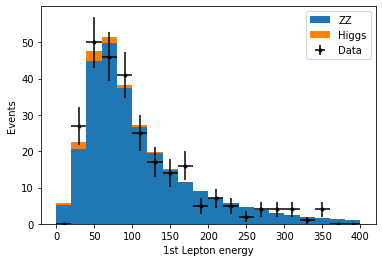

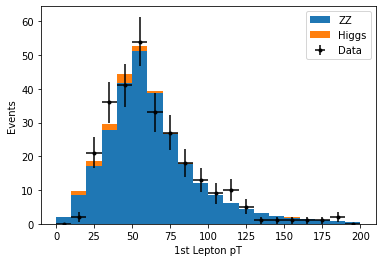

In [6]:
plot(20, 0, 400, LepEnergyData, [LepEnergyZZ, LepEnergyHiggs], [ WeightsZZ, WeightsHiggs] , [ 'ZZ', 'Higgs' ], '1st Lepton energy')
plot(20, 0, 200, LepPtData, [LepPtZZ, LepPtHiggs], [ WeightsZZ, WeightsHiggs] , [ 'ZZ', 'Higgs' ], '1st Lepton pT')
